# this notebook changes parameters for UMAP generation

In [1]:
import scanpy as sc 
import numpy as np
import pandas as pd
import os
import sys
from matplotlib import pyplot as plt
import anndata as ad


In [2]:
import seaborn as sn

In [3]:
sys.path.append("/home/lucy/star_proto_filter/")
sys.path.append("/home/lucy/")
sys.path.append("/home/lucy/AmbientContaminationMetrics/")
#sys.path.append("/home/lucy/quality/plot_quality_score.py")


In [4]:
import zc_filter_function as zc_filter
import quality_control_function as zc_qc
import plot_quality_score as qc_plt
import zc_function as zc

In [5]:
filtered_data_dir = '/home/lucy/Dropbox (VU Basic Sciences)/random_data_check/filtered_data/'

## load data

In [6]:
dat = sc.read("./new_sample_10868_filtered/subsampled_combine_WT_Mut.h5ad" )

In [7]:
dat

AnnData object with n_obs × n_vars = 9010 × 23312
    obs: 'sample', 'cell_type', 'cytotrace', 'leiden', 'condition'
    var: 'mean', 'std'
    uns: 'cell_type_colors', 'condition_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sample_colors', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'arcsinh', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [8]:
mut = dat[dat.obs['condition'] == 'Mtgr1 -/-' ] 

In [9]:
wt = dat[dat.obs['condition'] == 'WT' ] 

In [10]:
all_dat = [ dat, mut, wt]

In [11]:
for d in all_dat:
    d.raw = d.copy()
    d.layers['raw_counts'] = d.X.copy()

In [12]:
for d in all_dat:
    zc.normalization( d)

## make new umap for each dataset

try cosine distance 

In [13]:
for d in all_dat:
    zc.clustering( d, use_highly_variable= False, neighbor_distance_metrics='cosine' )

/home/lucy/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


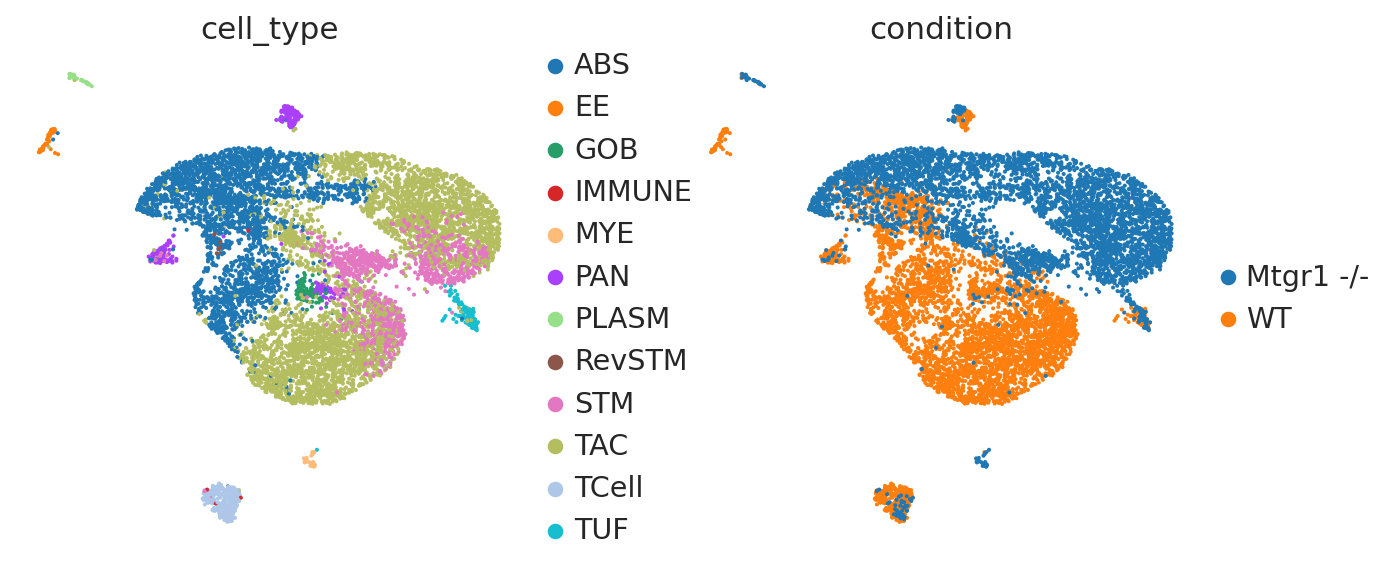

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


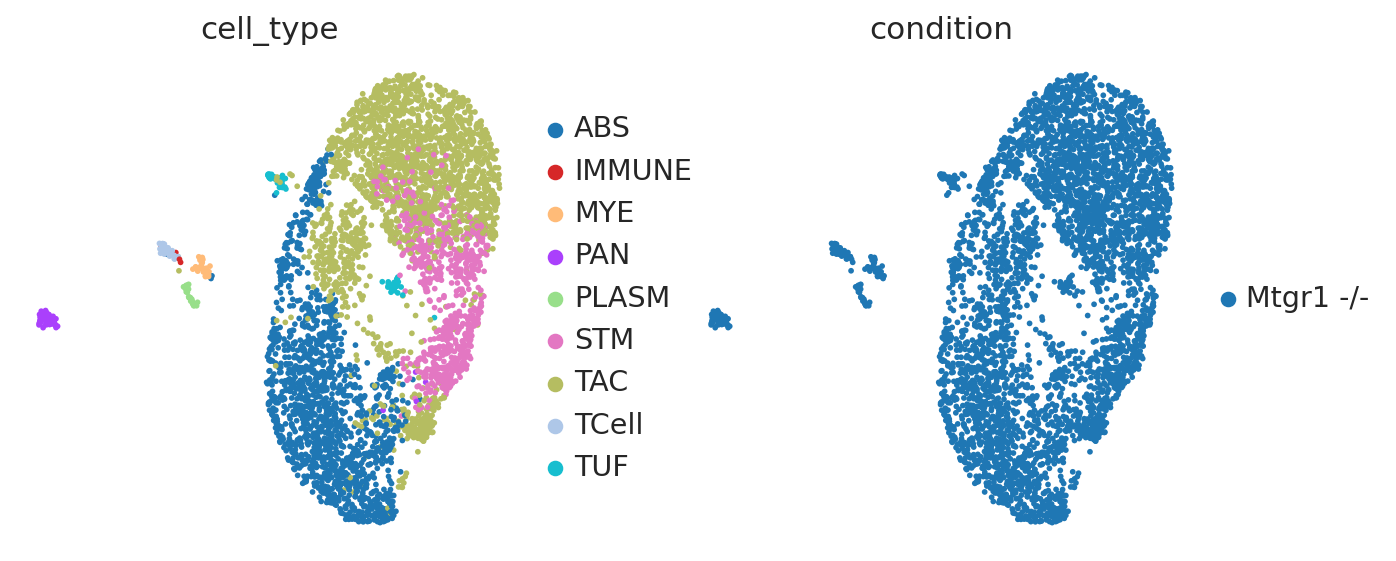

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


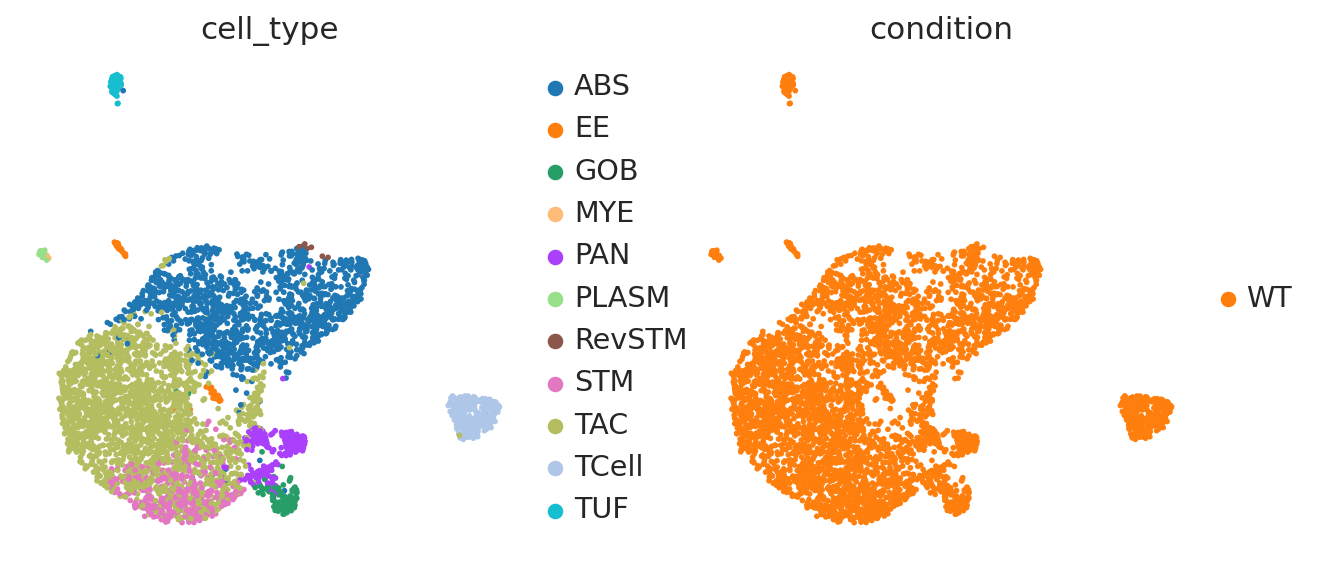

In [16]:
for d in all_dat:
    sc.tl.umap( d, init_pos='random', random_state= 10 )
    sc.pl.umap(d, color = ['cell_type', 'condition' ] )

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


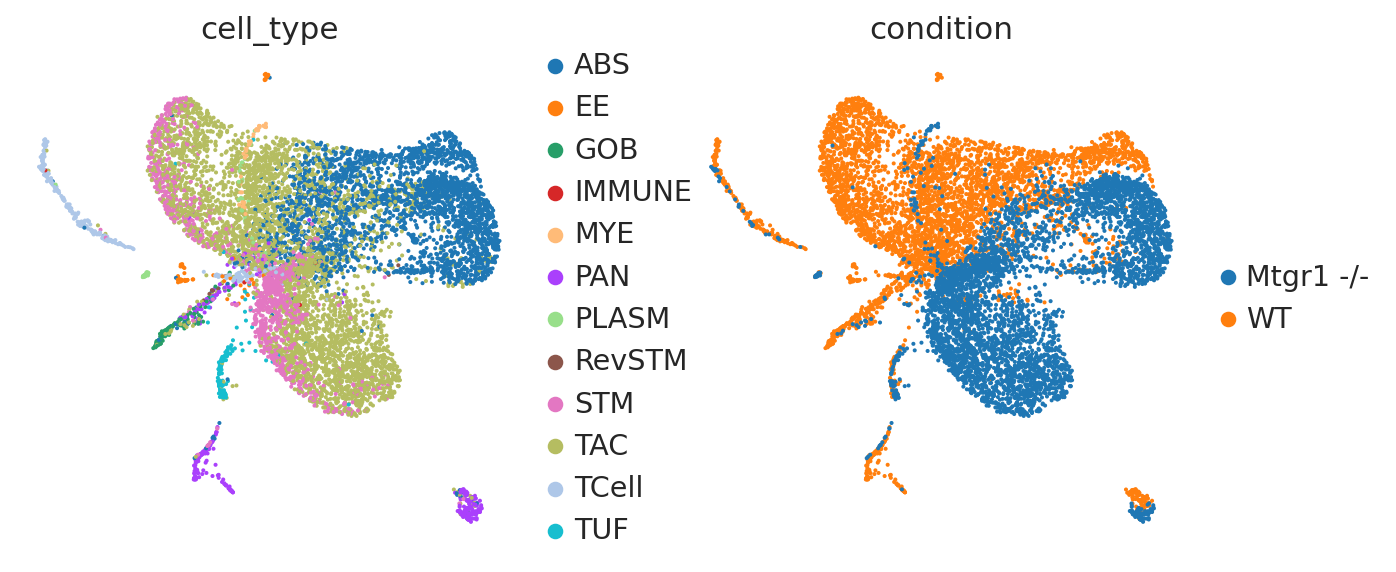

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


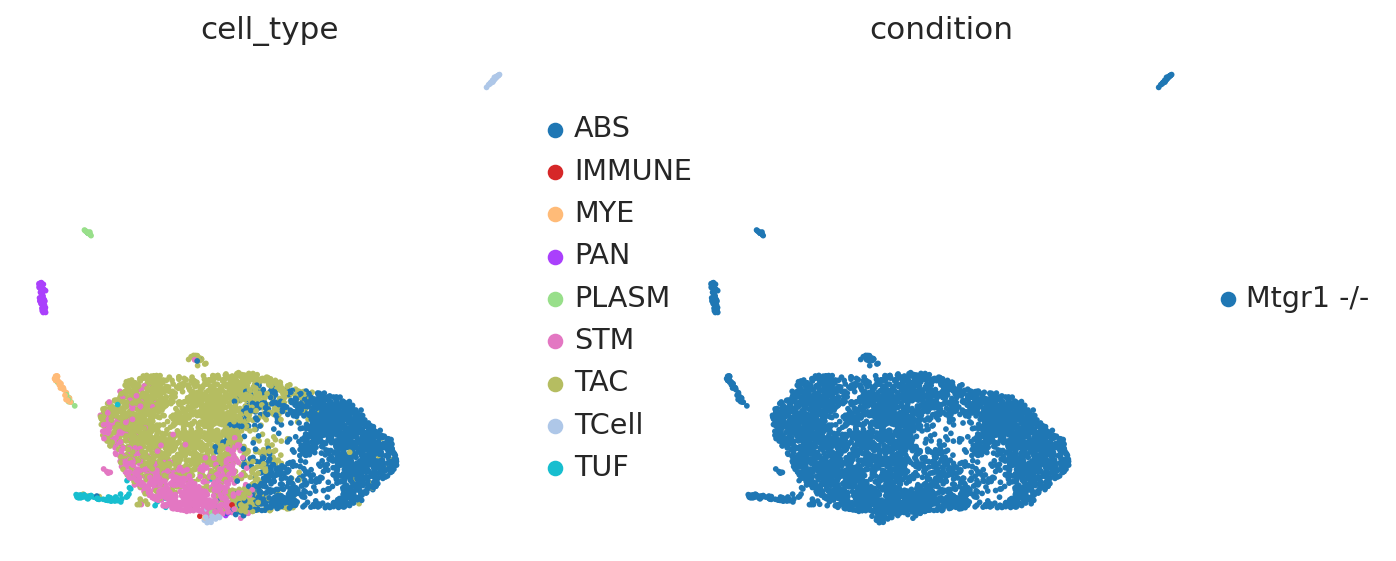

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


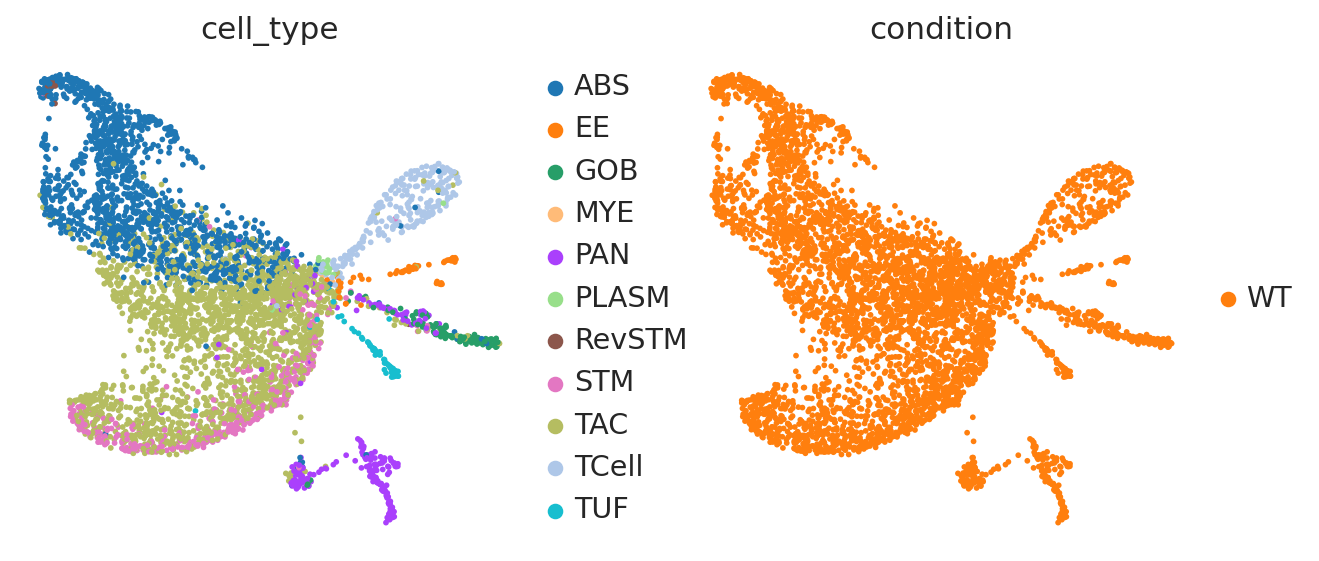

In [17]:
for d in all_dat:
    zc.clustering( d, use_highly_variable= True, neighbor_distance_metrics='cosine' )
    sc.pl.umap(d, color = ['cell_type', 'condition' ] )

In [29]:
dat

AnnData object with n_obs × n_vars = 9010 × 23312
    obs: 'sample', 'cell_type', 'cytotrace', 'leiden', 'condition'
    var: 'mean', 'std', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'condition_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sample_colors', 'treatment_colors', 'umap', 'hvg'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'arcsinh', 'raw_counts'
    obsp: 'connectivities', 'distances'

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


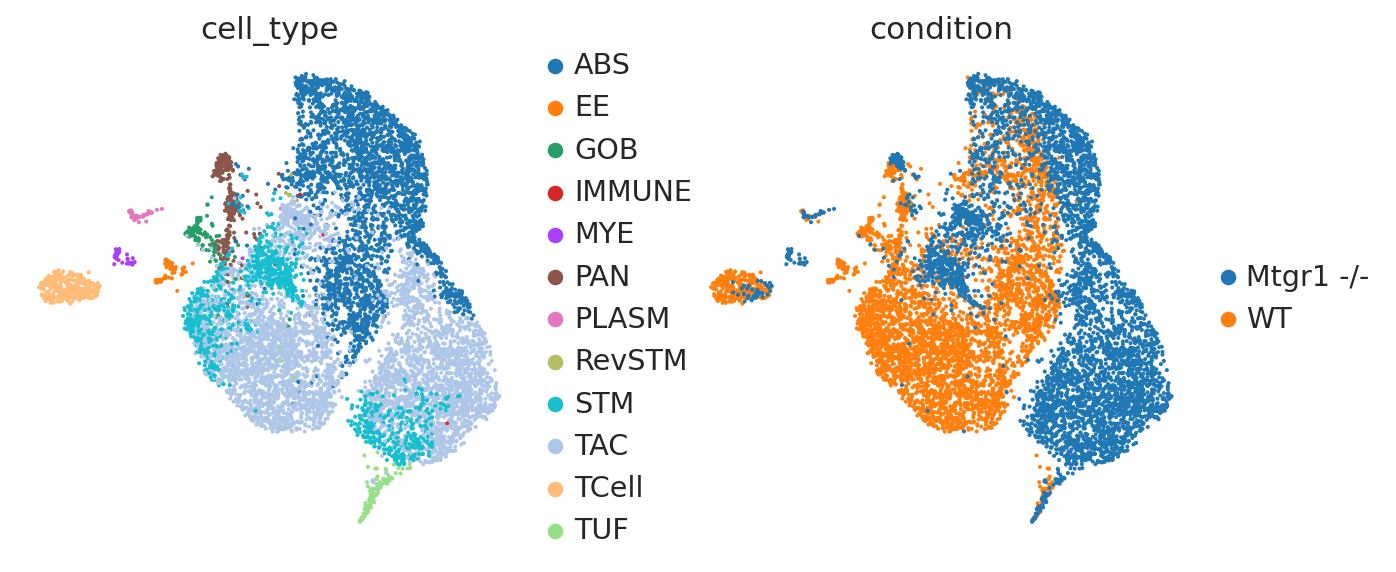

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


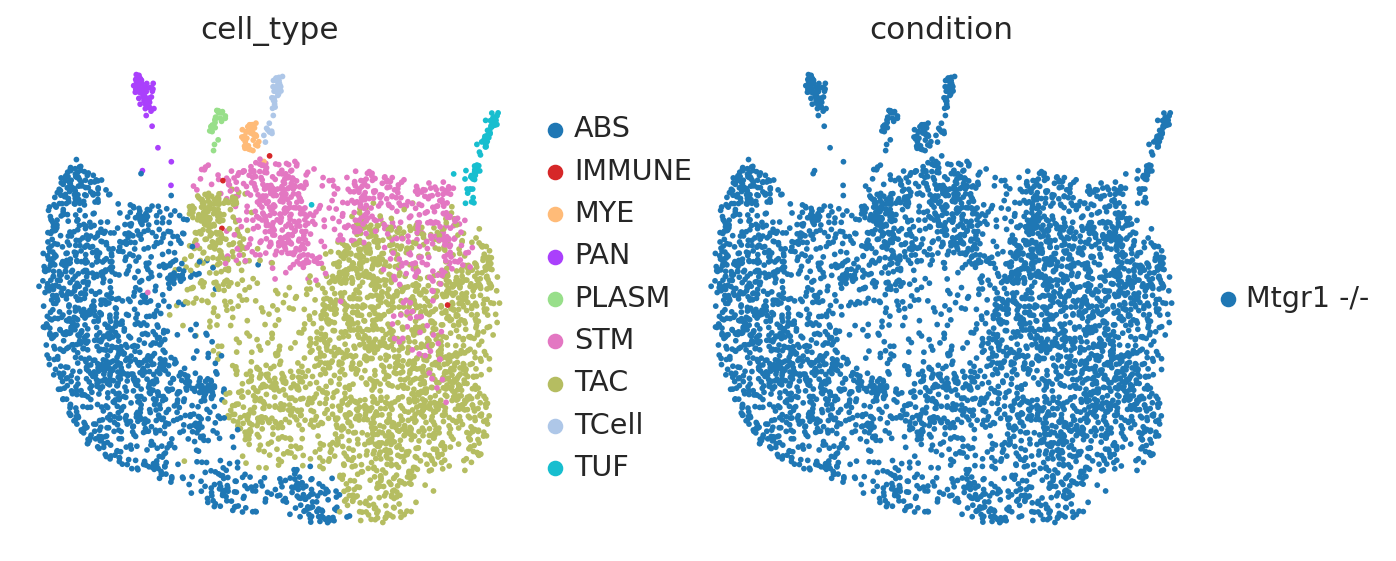

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


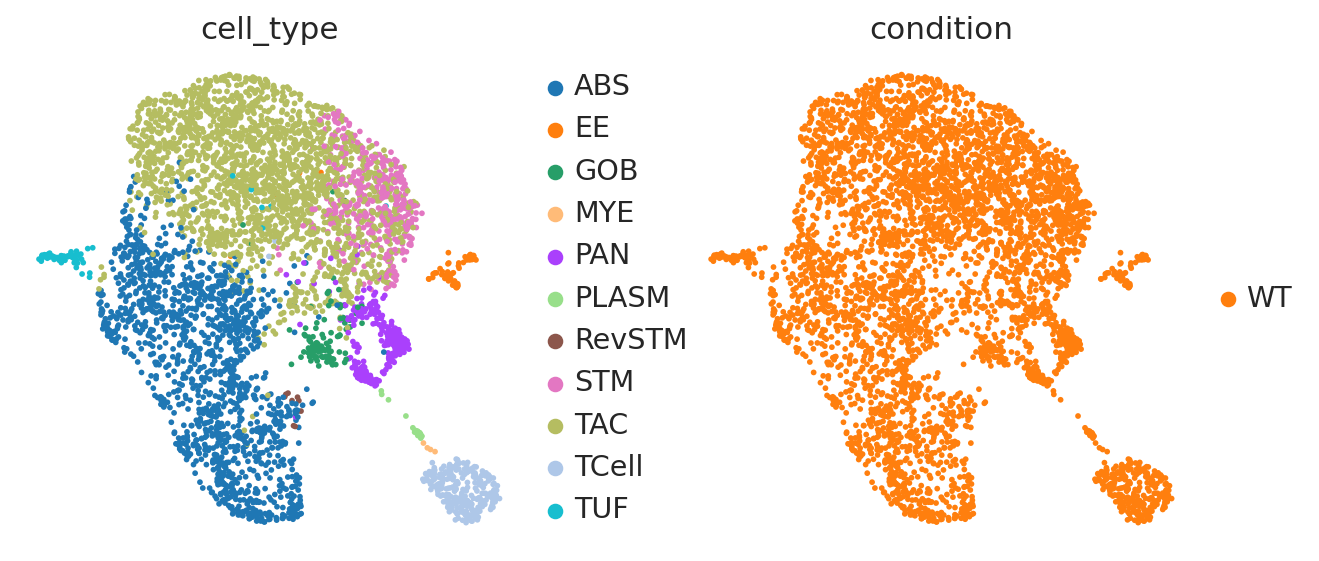

In [31]:
for d in all_dat:
    d.X = d.raw.X
    zc.normalization( d)
    zc.clustering( d) 
    sc.tl.umap( d, random_state= 25, )
    sc.pl.umap(d, color = ['cell_type', 'condition' ] )

## save data to csv

In [19]:
for d in all_dat:
    d.X = d.raw.X

In [22]:
for d in all_dat:
    print( d.X.sum(axis = 1) )

[ 2377.  1005. 12946. ...   887.   885.   883.]
[65981. 59557. 53141. ...   887.   885.   883.]
[ 2377.  1005. 12946. ...  3675. 14097. 13551.]


In [24]:
#all_dat = [ dat, mut, wt]
data_conditions = ["combined", 'Mtgr1_mut', 'wt' ] 

In [27]:
for i in range(len(all_dat)):
    d = all_dat[i]
    print( d.X.sum(axis = 1) )
    x = d.to_df()
    x.to_csv(f"./sample_csv/{data_conditions[i]}_mtx.csv", header = False, index = False)
    pd.Series( d.var_names ).to_csv(f"./sample_csv/{data_conditions[i]}_features.csv", header = False, index = False)
    pd.Series( d.obs_names ).to_csv(f"./sample_csv/{data_conditions[i]}_barcodes.csv", header = False, index = False)

[ 2377.  1005. 12946. ...   887.   885.   883.]
[65981. 59557. 53141. ...   887.   885.   883.]
[ 2377.  1005. 12946. ...  3675. 14097. 13551.]


In [26]:
pd.Series(dat.var_names).to_csv("./test.csv", header = False, index = False)

## use Ken's t-sne coordinate for WT cells

In [13]:
wt_tsne = pd.read_csv("./wt_tsne.csv", header = None, index_col = None)

In [14]:
wt_tsne.head()

0        1
0 -49.6820 -71.9510
1 -25.6990  -5.2864
2  20.8520  42.9260
3 -84.0760 -28.2780
4  -3.8192 -43.0740

In [18]:
wt_tsne[[0,1]].values

array([[-49.682 , -71.951 ],
       [-25.699 ,  -5.2864],
       [ 20.852 ,  42.926 ],
       ...,
       [-25.236 , -43.105 ],
       [ 57.751 ,  -8.1582],
       [ 36.655 ,  33.511 ]])

In [15]:
wt

View of AnnData object with n_obs × n_vars = 4505 × 23312
    obs: 'sample', 'cell_type', 'cytotrace', 'leiden', 'condition'
    var: 'mean', 'std'
    uns: 'cell_type_colors', 'condition_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sample_colors', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'arcsinh', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [16]:
wt.obsm['X_umap'] 

ArrayView([[-0.12691952,  5.603413  ],
           [ 5.0522003 ,  5.6988783 ],
           [ 8.40795   ,  3.5890121 ],
           ...,
           [ 1.4075946 ,  4.334441  ],
           [ 5.51847   , -1.0345488 ],
           [ 7.9565835 ,  2.6280348 ]], dtype=float32)

In [19]:
wt.obsm['orig_X_umap'] = wt.obsm['X_umap'].copy()

In [20]:
wt.obsm['X_umap'] = wt_tsne[[0,1]].values

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


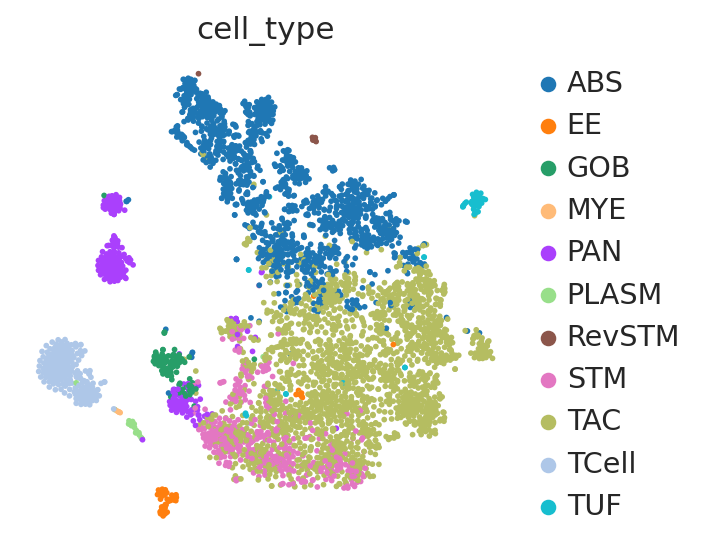

In [21]:
sc.pl.umap( wt,color = 'cell_type' )

In [23]:
tsne_ls = os.listdir( "./ken_tsnes/")

In [24]:
wt2 = wt.copy()

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


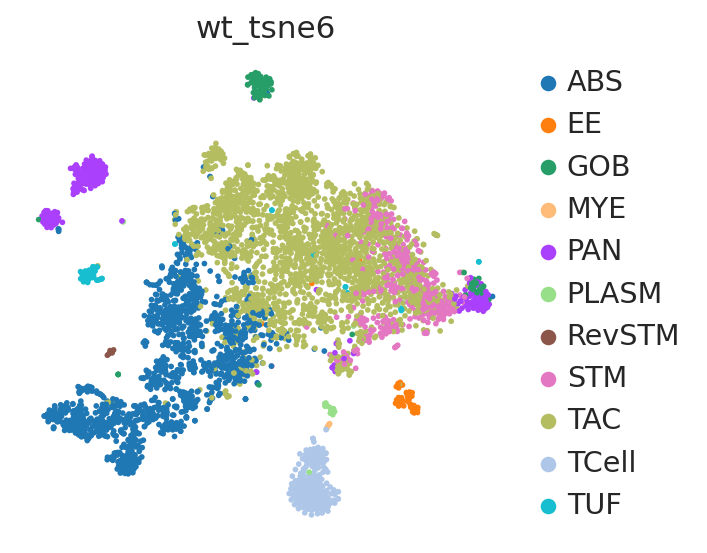

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


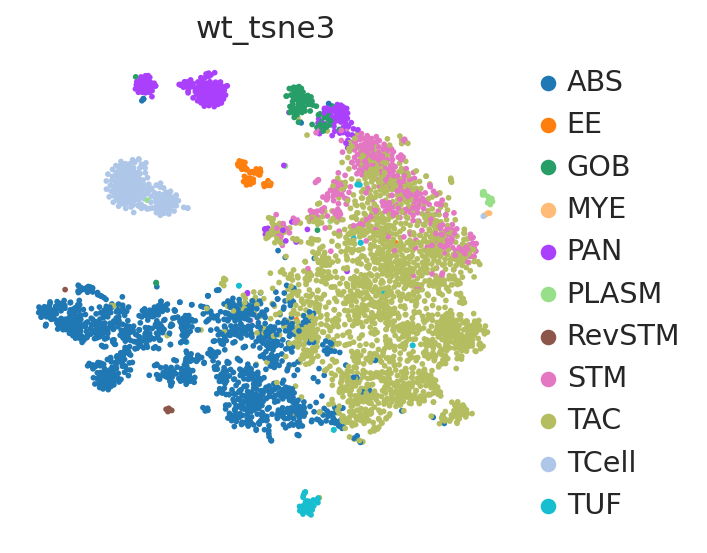

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


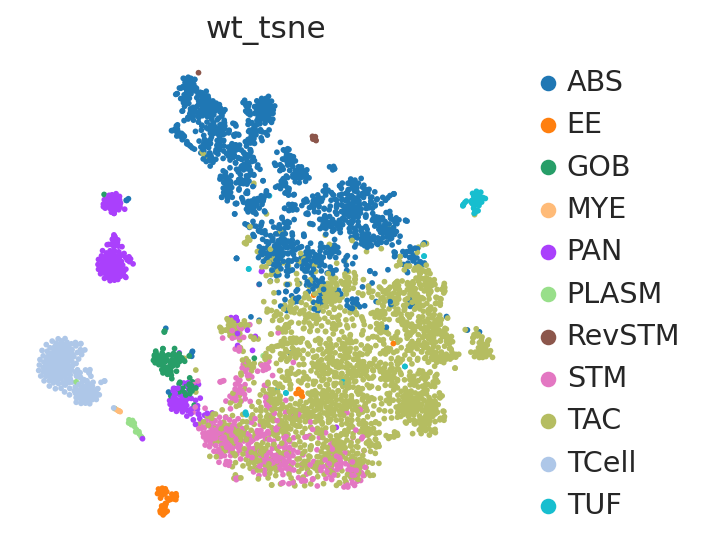

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


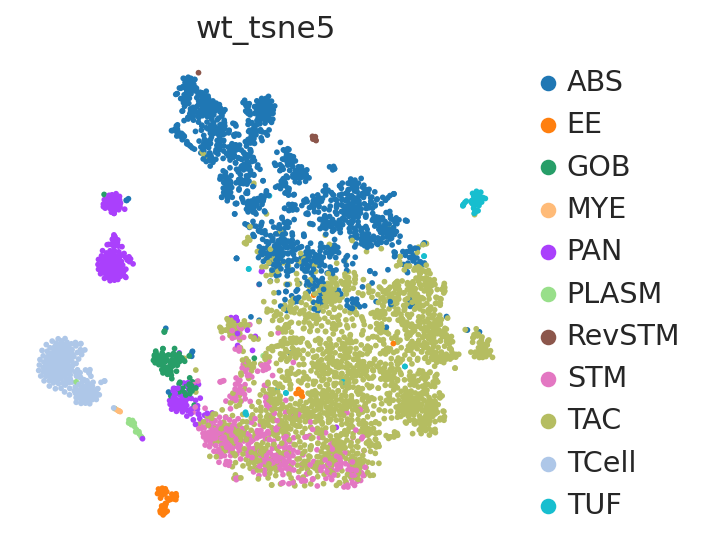

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


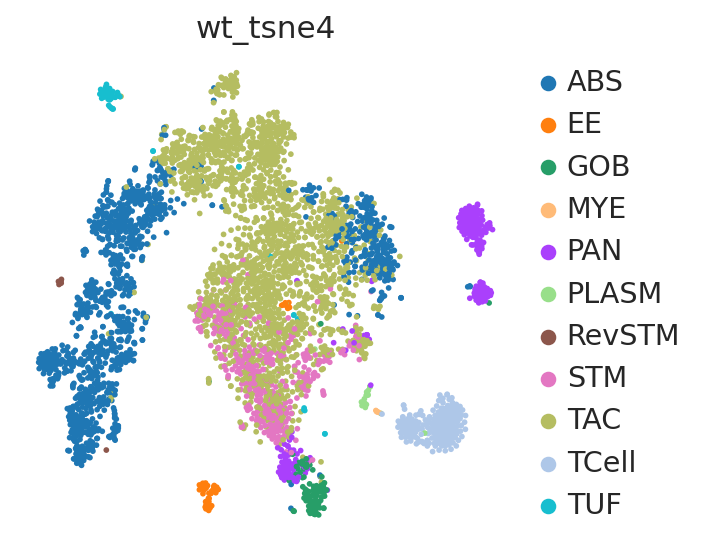

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


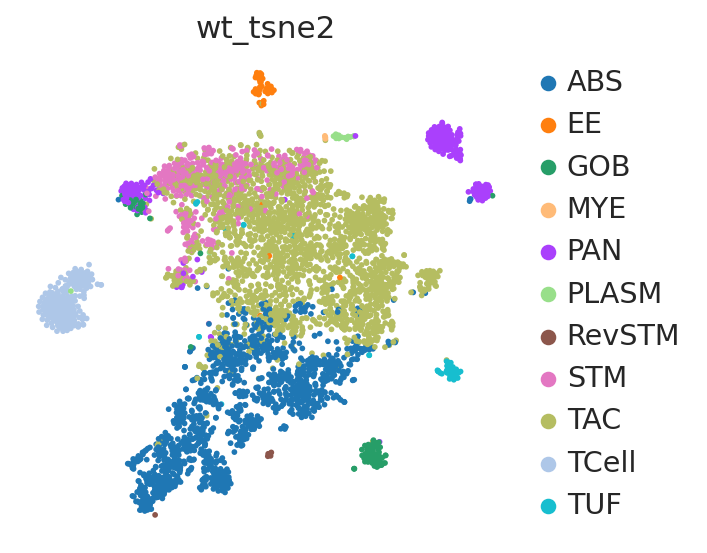

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


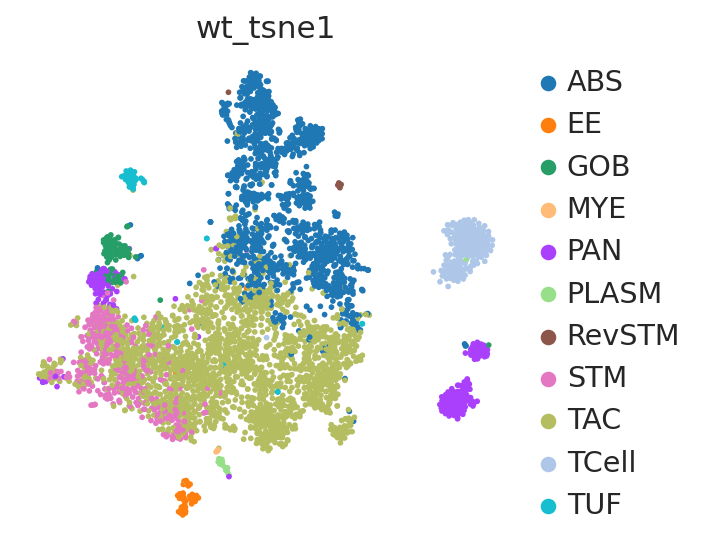

In [30]:
for i in range(len(tsne_ls)):
    ts = wt_tsne = pd.read_csv(f"./ken_tsnes/{tsne_ls[i]}", header = None, index_col = None)
    wt.obsm['X_umap'] = wt_tsne[[0,1]].values
    ts_name = tsne_ls[i].split('.')[0]
    sc.pl.umap( wt,color = 'cell_type', title = ts_name, save = ts_name + '.png'  )
    
    
    

## use Ken's coordinate for mut cells

In [46]:
mut_tsnes = pd.Series( os.listdir("./ken_tsnes/" ) )
mut_tsnes = mut_tsnes[mut_tsnes.str.startswith( "mt") ] 
mut_tsnes
                                               
                            

3     mt_tsne7.csv
6     mt_tsne8.csv
13    mt_tsne4.csv
14    mt_tsne6.csv
17    mt_tsne9.csv
18    mt_tsne2.csv
20    mt_tsne3.csv
25    mt_tsne1.csv
26    mt_tsne5.csv
dtype: object

In [47]:
new_mut_fnames = [f'mt_tsne{i}.csv' for i in [5,6,7,8,9] ]

In [33]:
mut

View of AnnData object with n_obs × n_vars = 4505 × 23312
    obs: 'sample', 'cell_type', 'cytotrace', 'leiden', 'condition'
    var: 'mean', 'std'
    uns: 'cell_type_colors', 'condition_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sample_colors', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'arcsinh', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [34]:
mut2 = mut.copy()

In [37]:
ts =  pd.read_csv(f"./ken_tsnes/{mut_tsnes.iloc[i]}", header = None, index_col = None)

0        1
0    -28.4200  74.0890
1    -32.3610 -50.6880
2     10.5580  32.1290
3    -31.3030  31.9260
4    -37.4580  -6.2321
...       ...      ...
4500 -43.1020 -28.9950
4501  64.0560  40.1460
4502  16.9700  10.4000
4503   0.9949 -79.9970
4504 -32.7240 -18.7310

[4505 rows x 2 columns]

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


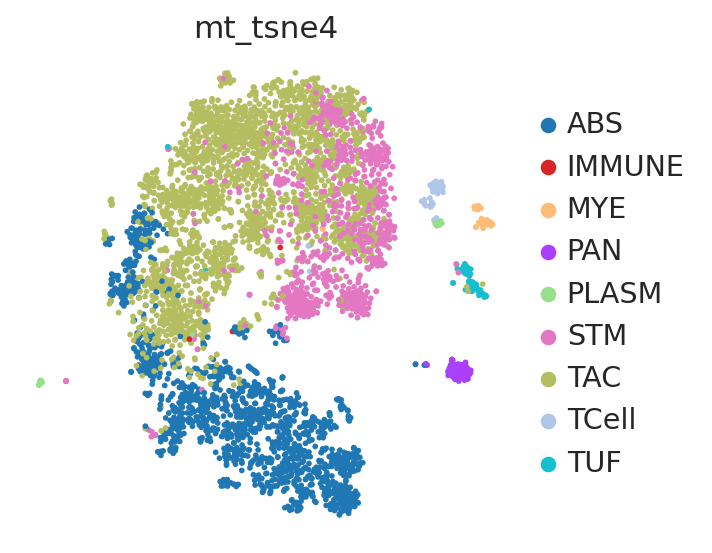

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


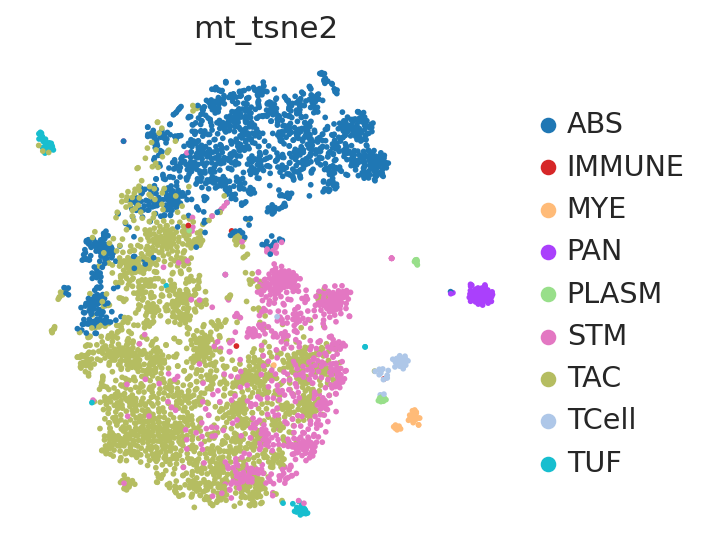

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


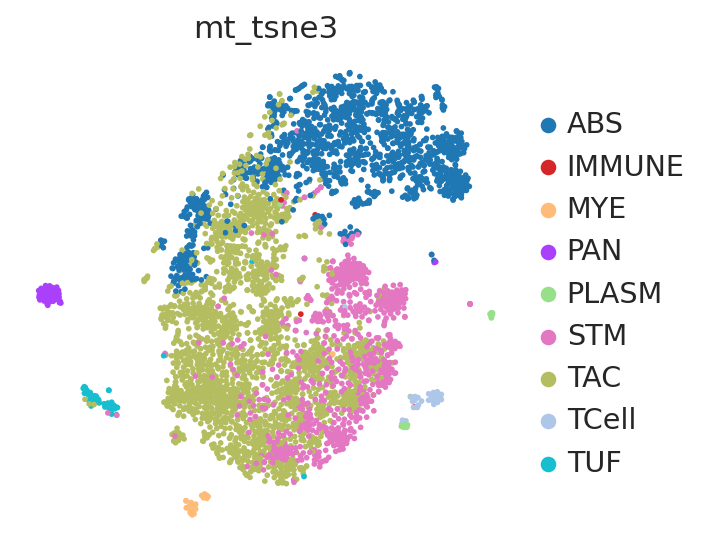

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


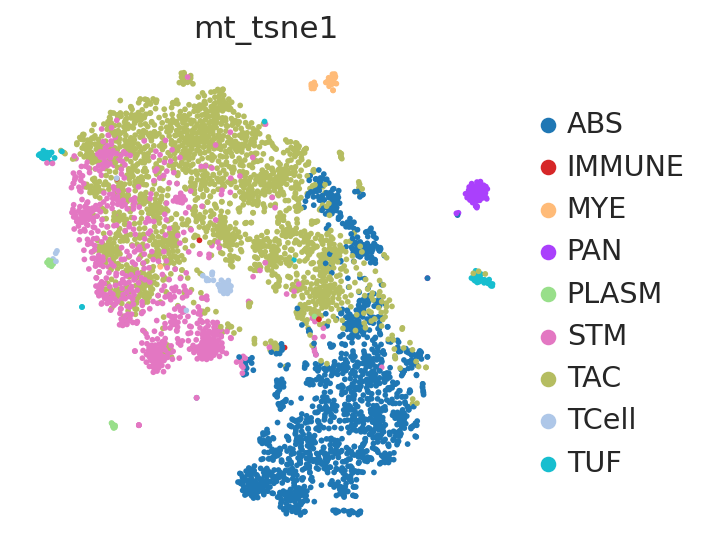

In [44]:
for i in range(len(mut_tsnes)):
    ts =  pd.read_csv(f"./ken_tsnes/{mut_tsnes.iloc[i]}", header = None, index_col = None)
    mut2.obsm['X_umap'] = ts[[0,1]].values
    ts_name = mut_tsnes.iloc[i].split('.')[0]
    sc.pl.umap( mut2,color = 'cell_type', title = ts_name, save = ts_name + '.png'  )
    
    
    

In [45]:
mut

View of AnnData object with n_obs × n_vars = 4505 × 23312
    obs: 'sample', 'cell_type', 'cytotrace', 'leiden', 'condition'
    var: 'mean', 'std'
    uns: 'cell_type_colors', 'condition_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sample_colors', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'arcsinh', 'raw_counts'
    obsp: 'connectivities', 'distances'

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


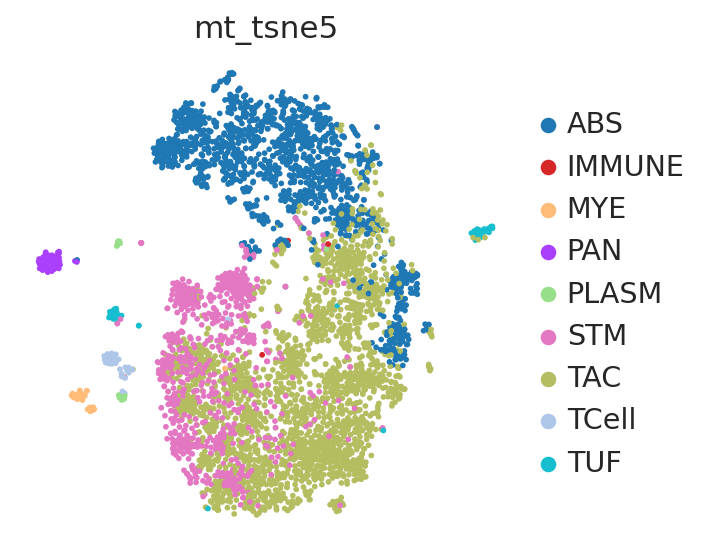

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


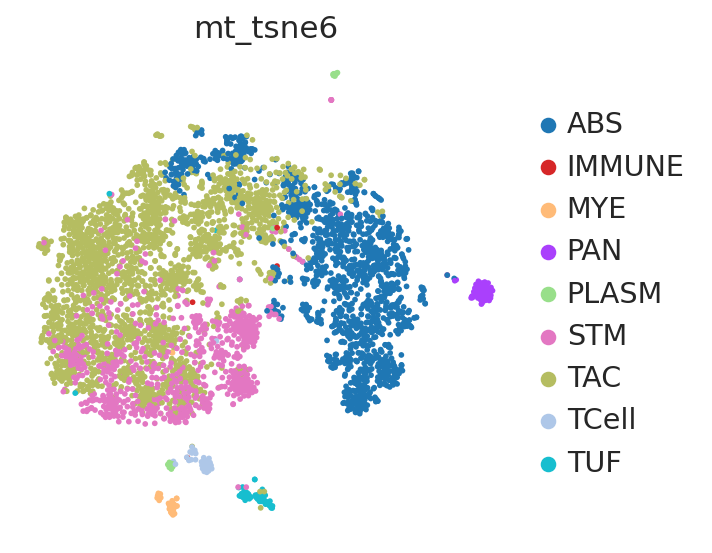

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


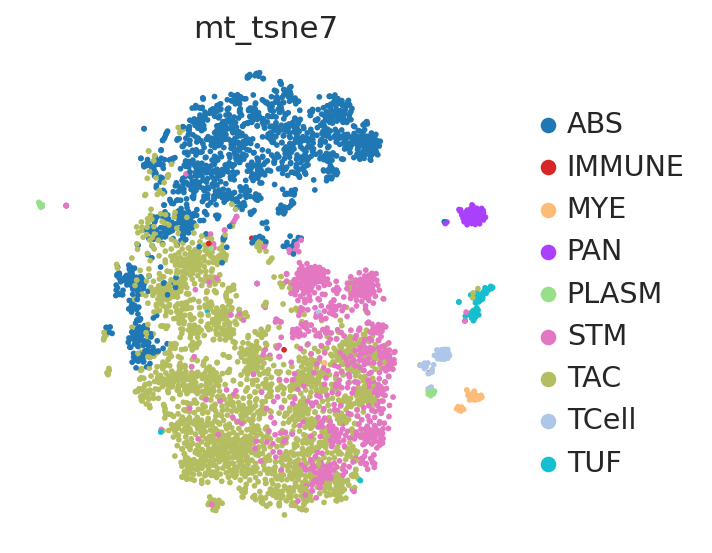

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


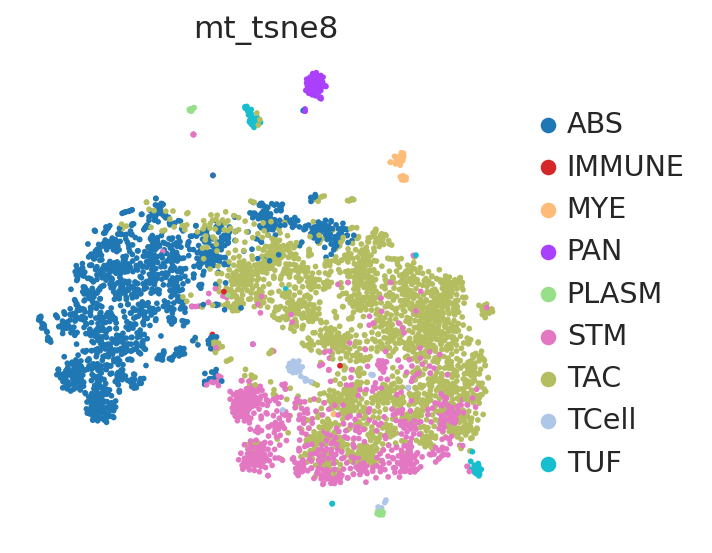

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


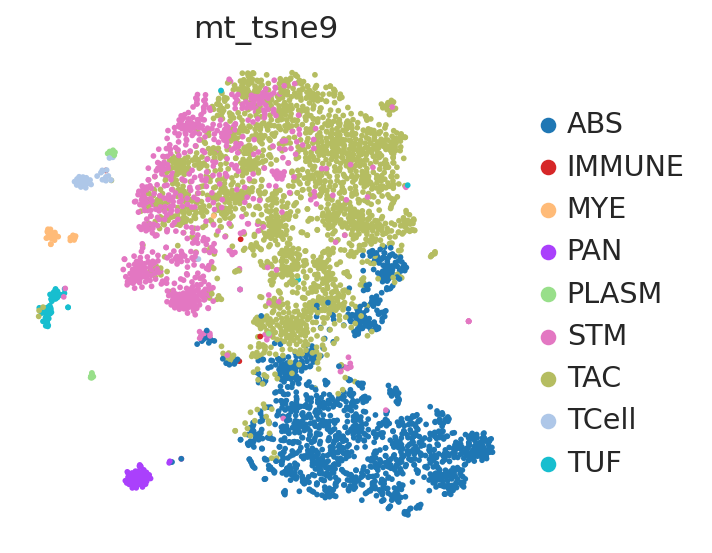

In [50]:
for i in range(len(new_mut_fnames)):
    ts =  pd.read_csv(f"./ken_tsnes/{new_mut_fnames[i]}", header = None, index_col = None)
    mut2.obsm['X_umap'] = ts[[0,1]].values
    ts_name = new_mut_fnames[i].split('.')[0]
    #print( ts_name)
    sc.pl.umap( mut2,color = 'cell_type', title = ts_name, save = ts_name + '.png'  )
    